In [35]:

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


# Sampling Distribution of a Statistic

## Random Sampling ##

We load in a dataset of all United flights national flights from 6/1/15 to 8/9/15, their destination and how long they were delayed, in minutes.

In [36]:
united = pd.read_csv('united.csv')
#united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


A random sample:

In [38]:
# Use the df.sample() method.  Note, the default is replace=False
united.sample(6, replace=True)

,Date,Flight Number,Destination,Delay
9598,8/3/15,1721,KOA,37
9328,8/2/15,268,SNA,1
3575,6/24/15,1681,CLE,-4
1396,6/10/15,751,SEA,124
8134,7/25/15,331,DEN,0
6767,7/16/15,663,HNL,6


## Population Distribution ##

In [ ]:
united 

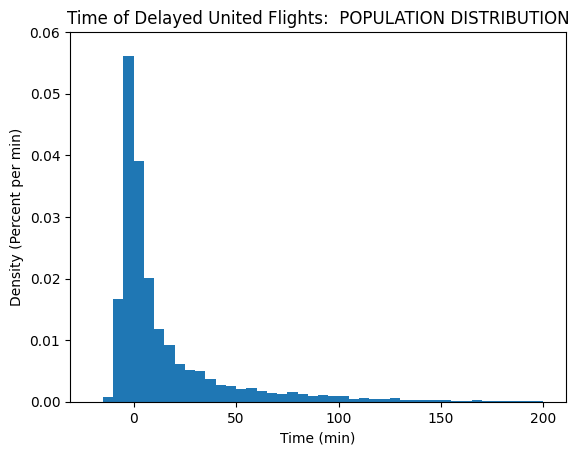

In [39]:
united_bins = np.arange(-20, 201, 5);

plt.hist(united["Delay"], bins=united_bins, density=True);
plt.title("Time of Delayed United Flights:  POPULATION DISTRIBUTION")
plt.xlabel("Time (min)")
plt.ylabel("Density (Percent per min)")
plt.ylim(0,0.06);

## Calculating Population Parameters

In [57]:
## Population Median:
united["Delay"].median()

2.0

In [58]:
## Population  min
min(united['Delay'])

-16

In [11]:
## Population max

max(united['Delay'])

580

In [7]:
# Population mean
np.average(united['Delay'])  

16.658155515370705

In [60]:
# Population std
np.std(united["Delay"])

39.48019985160957

## Sample Distribution ##

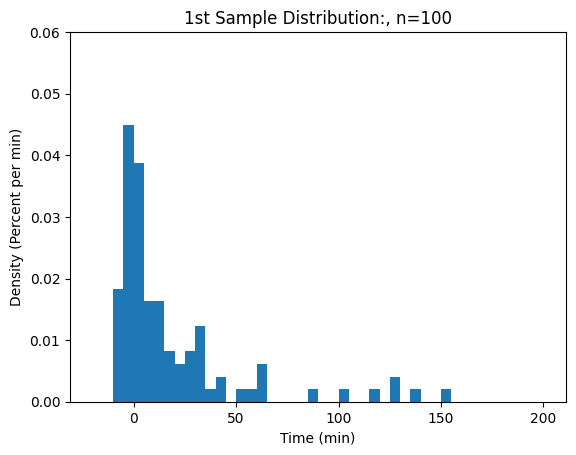

In [40]:
a = united.sample(100, replace=True);

plt.hist(a["Delay"],bins=united_bins, density=True);

plt.title("1st Sample Distribution:, n=100")

plt.xlabel("Time (min)")
plt.ylabel("Density (Percent per min)")
plt.ylim(0,0.06);

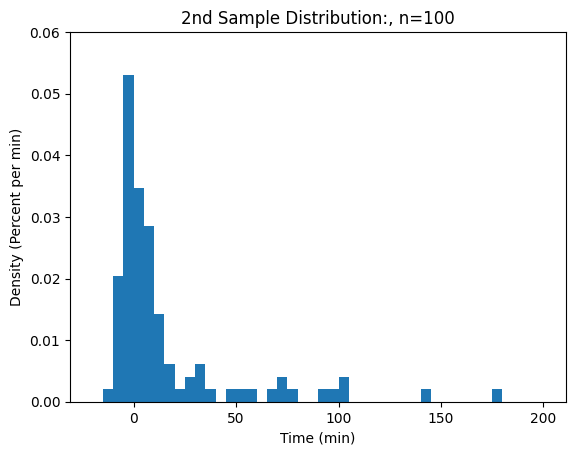

In [43]:
b = united.sample(100, replace=True);

plt.hist(b["Delay"],bins=united_bins, density=True);

plt.title("2nd Sample Distribution:, n=100")


plt.xlabel("Time (min)")
plt.ylabel("Density (Percent per min)")
plt.ylim(0,0.06);

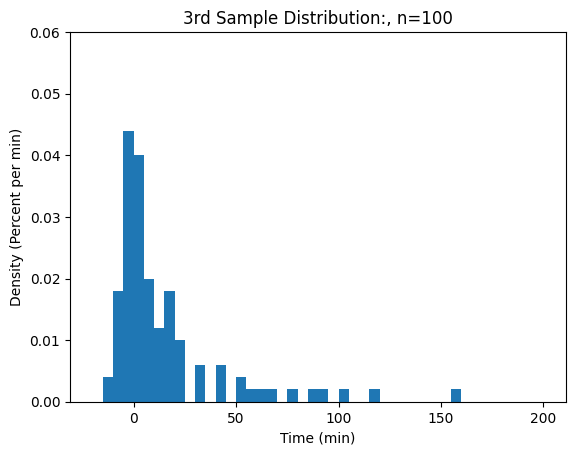

In [44]:
c = united.sample(100, replace=True);

plt.hist(c["Delay"],bins=united_bins, density=True);

plt.title("3rd Sample Distribution:, n=100")


plt.xlabel("Time (min)")
plt.ylabel("Density (Percent per min)")
plt.ylim(0,0.06);

## Sampling Distribution of Sample Median

In [41]:
# Statistic (median) from 1st sample:
a["Delay"].median()

5.0

In [45]:
b["Delay"].median()

2.5

In [46]:
c["Delay"].median()

2.0

In [47]:
def sample_median(size):
    return np.median(united.sample(size, replace=True)["Delay"])

In [51]:
sample_median(100)

2.0

In [52]:
sample_medians = [ ]

for i in np.arange(10000):
    new_median = sample_median(100)
    sample_medians = np.append(sample_medians, new_median)

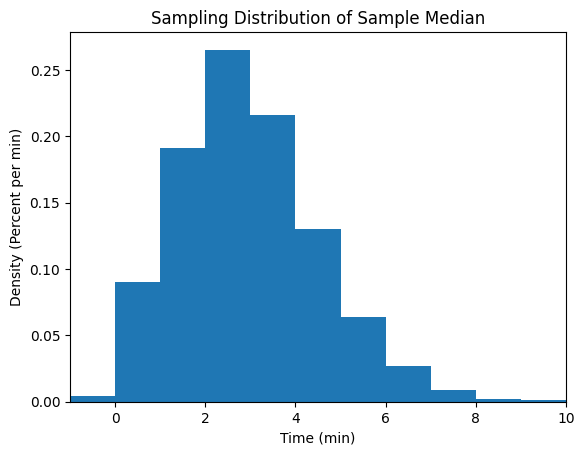

In [53]:
plt.hist(sample_medians,bins = np.arange(-10,31), density=True);
plt.title("Sampling Distribution of Sample Median")


plt.xlabel("Time (min)")
plt.ylabel("Density (Percent per min)")
plt.xlim(-1,10);


In [54]:
sample_medians.mean()

2.6021

## Sampling Distribution of Sample Mean

In [55]:
def sample_mean(size):
    return np.mean(united.sample(size, replace=True)["Delay"])

In [56]:
sample_means= [ ]

for i in np.arange(10000):
    new_mean = sample_mean(100)
    sample_means = np.append(sample_means, new_mean)

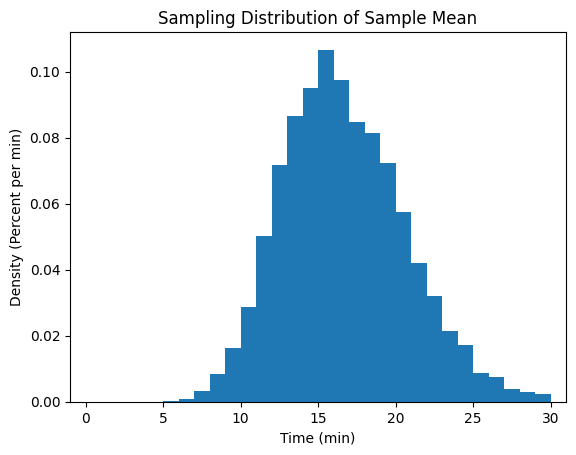

In [57]:
plt.hist(sample_means,bins = np.arange(-10,31), density=True);
plt.title("Sampling Distribution of Sample Mean")


plt.xlabel("Time (min)")
plt.ylabel("Density (Percent per min)")
plt.xlim(-1,31);


In [58]:
sample_means.mean()

16.677508000000003

In [59]:
np.average(united['Delay'])  

16.658155515370705

In [1]:
from scipy import stats

In [4]:
1-stats.norm.cdf(175000, 162000, 32000/10)

2.4274973856708293e-05